# Safe Haven Basket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [19]:
def GetRet(Liste, Start = "20100101", End = pd.to_datetime("today").strftime("%Y%m%d"), Returns = True):
    Res = blp.bdh(tickers= Liste,start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    if Returns == True:
        Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20100101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())
    plt.axvline(x=pd.to_datetime("2020-03-09"), c="k")
    plt.show()
    return "Plot!"


In [20]:
SHListe = ["JPYUSD Curncy", "GCA Comdty", "SIA Comdty", "XTC5 GY Equity"]
EQDSHListe = ["S5UTIL Index", "S5CONS Index", "S5HLTH Index"]

In [25]:
df = GetRet(SHListe, Start = "20100101")

Sharpe -0.42581880027167185


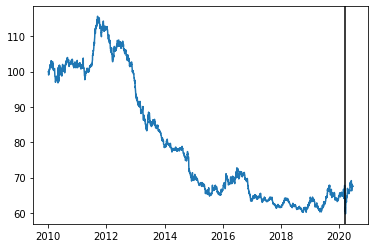

'Plot!'

In [26]:
Plot(df)

Sharpe 0.29690937662788985


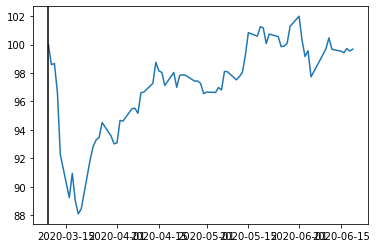

'Plot!'

In [23]:
Plot(df[df.index >= pd.to_datetime("2020-03-09")])

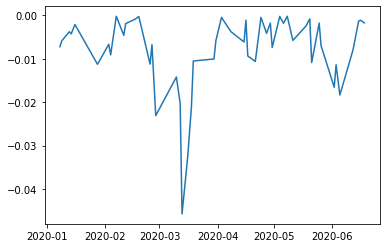

In [24]:
plt.plot(df[df < 0])

In [18]:
df < 0

2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08     True
              ...  
2020-06-15     True
2020-06-16     True
2020-06-17    False
2020-06-18     True
2020-06-19    False
Length: 122, dtype: bool

In [7]:
Sector = ["S5ENRS Index", "S5FINL Index", "S5MATR Index", "S5INDU Index", "S5HLTH Index", "S5TELS Index", "S5CONS Index", "S5COND Index", "S5INFT Index", "S5UTIL Index", "S5RLST Index"]

In [8]:
Test = GetRet(Sector, Start="20200201", Returns = False)

In [9]:
Test.iloc[0,:] = 1

In [10]:
Test = Test + 1

In [11]:
Test.iloc[0,:] = 100

In [12]:
Test = Test.cumprod()

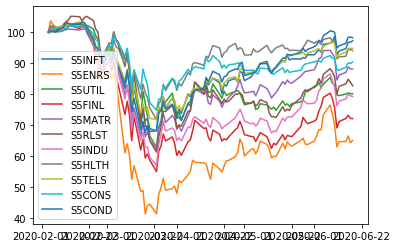

In [13]:
plt.plot(Test)
plt.legend([x.split(" ")[0] for x in Test.columns])
#plt.rcParams["figure.figsize"] = (20,10)
plt.show()